In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn              # To create models
import torch.nn.functional as f    # To get optimizer functions 

In [2]:
torch.cuda.is_available()          #Check GPU availability

True

In [3]:
torch.cuda.current_device()        #Check current device

0

In [4]:
torch.cuda.get_device_name(0)      #Check device name

'GeForce RTX 2060 with Max-Q Design'

In [5]:
print(torch.cuda.memory_allocated())          # See memory allocated. It will be 0 until you initiate GPU by using .cuda() with 
                                              # tensors and models. Till then, it will use CPU not GPU.

print(torch.cuda.memory_cached())             

0
0


C:\Users\jainp\anaconda3\lib\site-packages\torch\cuda\memory.py:373: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


In [6]:
#We have to explicitly mention cuda for running our code on GPU

#For example:
v1 = torch.FloatTensor([1.0,2.0,3.0])           #Normal tensor creation
v1.device

device(type='cpu')

In [7]:
v1 = torch.FloatTensor([1.0,2.0,3.0]).cuda()              #Tensor created on GPU
v1.device

device(type='cuda', index=0)

In [8]:
#Read input data

df = pd.read_csv('diabetes.csv')

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [9]:
#Check shape of our input data
df.shape

(768, 9)

In [10]:
#Check NULL values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#Pie chart with outcome (Diabetic or non-dibetic)
px.pie(df, names="Outcome")

<AxesSubplot:xlabel='Outcome', ylabel='count'>

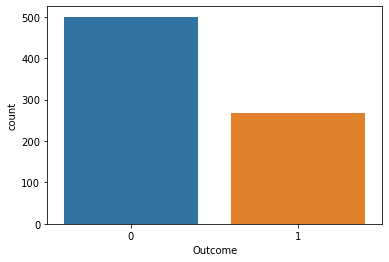

In [12]:
#Frequency plot of outcome
sns.countplot(x="Outcome", data=df)

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

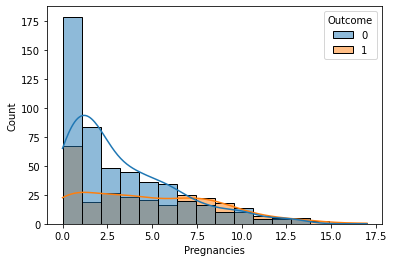

In [13]:
#Histogram of Pregnencies vs count  with kernel density estimate
sns.histplot(x="Pregnancies", hue = "Outcome", data=df , kde=True)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

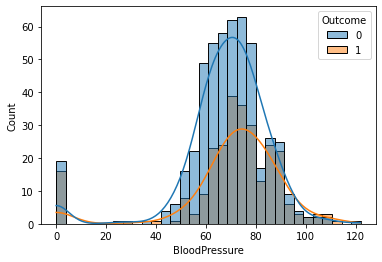

In [14]:
#Histogram of Blood Pressure vs count  with kernel density estimate
sns.histplot(x="BloodPressure", hue="Outcome", data=df, kde=True)

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

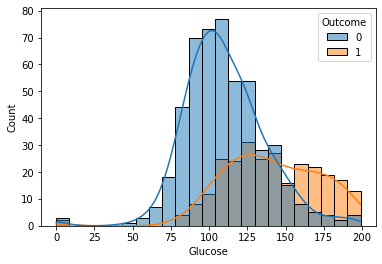

In [15]:
#Histogram of Glucose vs count  with kernel density estimate
sns.histplot(x="Glucose", hue="Outcome", data=df, kde=True)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

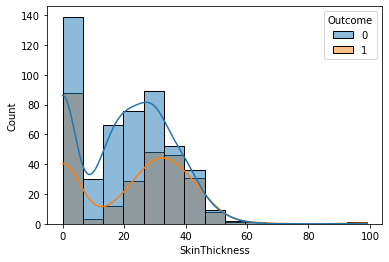

In [16]:
#Histogram of SkinThickness vs count  with kernel density estimate
sns.histplot(x="SkinThickness", hue="Outcome", data=df, kde=True)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

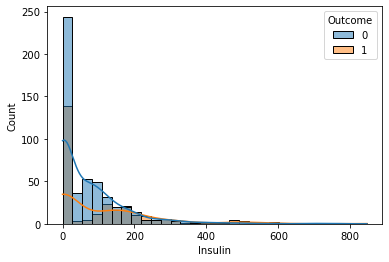

In [17]:
#Histogram of Insulin vs count  with kernel density estimate
sns.histplot(x="Insulin", hue="Outcome", data=df, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

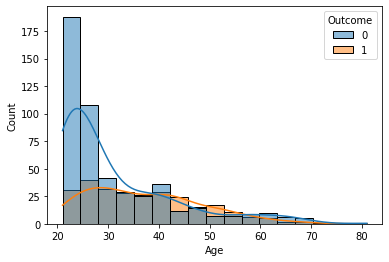

In [18]:
#Histogram of Age vs count  with kernel density estimate
sns.histplot(x="Age", hue="Outcome", data=df, kde=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

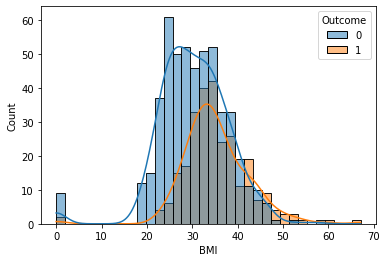

In [19]:
#Histogram of BMI vs count  with kernel density estimate
sns.histplot(x="BMI", hue="Outcome", data=df, kde=True)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

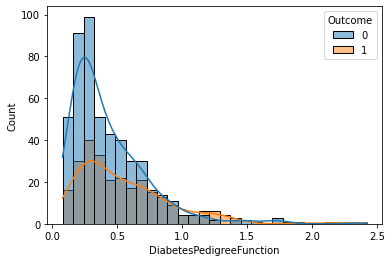

In [20]:
#Histogram of Diabetes Pedigree Function vs count  with kernel density estimate
sns.histplot(x="DiabetesPedigreeFunction", hue="Outcome", data=df, kde=True)

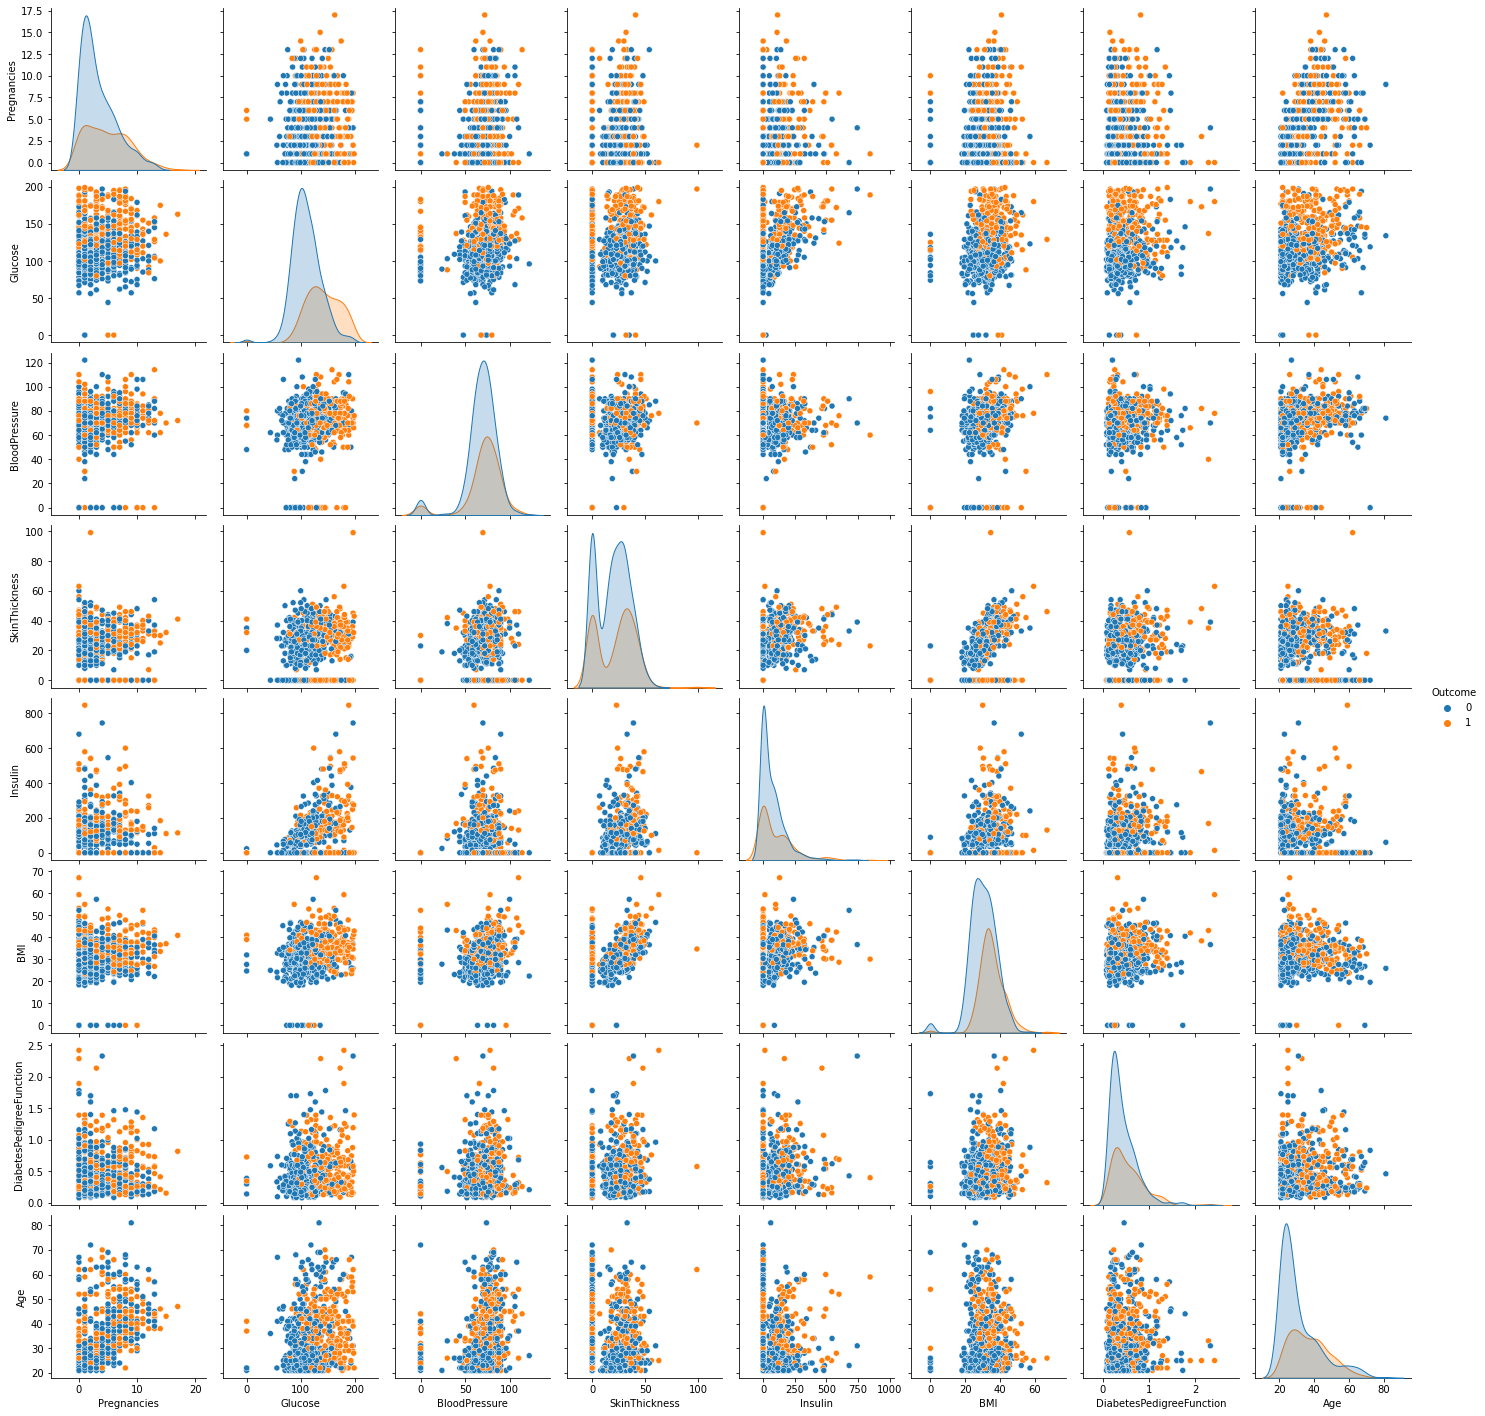

In [21]:
#Pair plot
sns.pairplot(df, hue="Outcome") 

Text(0.5, 1.0, 'Correlation')

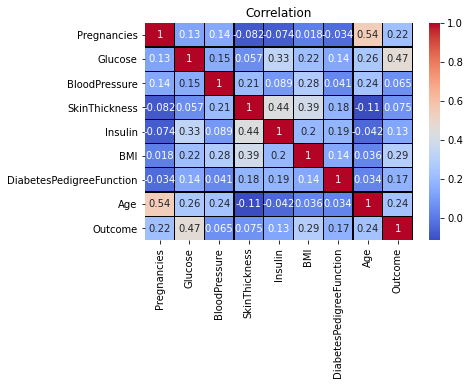

In [22]:
#Correlation matrix
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, cmap='coolwarm', linecolor='black', annot=True).set_title("Correlation")

In [23]:
#Get output(Y) as outcome column and input(X) by dropping outcome column.

X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
# Convert all inputs to tensors and activate it on cuda.

X_train = torch.FloatTensor(X_train).cuda()
X_test = torch.FloatTensor(X_test).cuda()

y_train =torch.LongTensor(y_train).cuda()
y_test =torch.LongTensor(y_test).cuda()

In [25]:
X_train.device

device(type='cuda', index=0)

In [26]:
## Creating model using two hidden layers, one output layer and relu activation function.

class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20,hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = f.relu(self.f_connected1(x))
        x = f.relu(self.f_connected2(x))
        x = self.out(x)
        return x


In [27]:
# Instantiate ANN model
torch.manual_seed(20)
model= ANN_Model().cuda()

In [28]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [29]:
## Backward Propogation : we have to define loss function and the optimizer.

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
epochs = 500
final_losses = []

for i in range(epochs):
    i = i+1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if i%10 ==1:
        print("Epoch number is: {} and the loss value is: {} ".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number is: 1 and the loss value is: 3.4572105407714844 
Epoch number is: 11 and the loss value is: 0.8019207715988159 
Epoch number is: 21 and the loss value is: 0.6090319752693176 
Epoch number is: 31 and the loss value is: 0.5917771458625793 
Epoch number is: 41 and the loss value is: 0.5679706931114197 
Epoch number is: 51 and the loss value is: 0.5529041290283203 
Epoch number is: 61 and the loss value is: 0.5410094857215881 
Epoch number is: 71 and the loss value is: 0.5310389995574951 
Epoch number is: 81 and the loss value is: 0.522036075592041 
Epoch number is: 91 and the loss value is: 0.5135971307754517 
Epoch number is: 101 and the loss value is: 0.5061255097389221 
Epoch number is: 111 and the loss value is: 0.49834105372428894 
Epoch number is: 121 and the loss value is: 0.49605512619018555 
Epoch number is: 131 and the loss value is: 0.4828636944293976 
Epoch number is: 141 and the loss value is: 0.4755901098251343 
Epoch number is: 151 and the loss value is: 0.4819

Text(0.5, 0, 'Epoch')

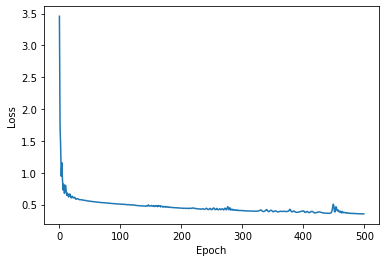

In [31]:
## Plot the loss function

plt.plot(range(epochs), final_losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [32]:
#### Predictions

predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred= model(data).argmax().item()
        predictions.append(y_pred)
        print(y_pred)

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [33]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [34]:
cm = confusion_matrix(y_test.cpu(), predictions)

cm

array([[91, 16],
       [14, 33]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

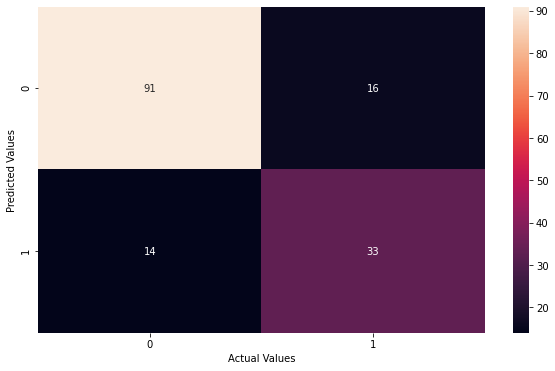

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [36]:
score = accuracy_score(y_test.cpu(), predictions)

score

0.8051948051948052

In [37]:
# Save the model
torch.save(model,'pima_diabetes.pt')

In [38]:
#Try loading the model back
model = torch.load('pima_diabetes.pt')

In [39]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [40]:
### Prediction of new data point
l1 = [7.0, 150.0, 70.0, 31.0, 0.0, 35.0, 0.83, 52.0]

In [41]:
n1 = torch.tensor(l1).cuda()
with torch.no_grad():
    print(model(n1))
    print(model(n1).argmax().item())

tensor([1.2162, 2.7363], device='cuda:0')
1
